# Cohort Analysis Using Purchase Data

In [250]:
%matplotlib inline
import numpy as np
import pandas as pd
from ggplot import *
from altair import *
import seaborn as sbn

In [113]:
df = pd.read_excel('chapter-12-relay-foods.xlsx', sheetname='Purchase Data - Full Study')

In [114]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


### Convert Date to Year-Month format.
* Use map function to run through each row.

In [115]:
def dateconv(date):
    return(date.strftime('%Y-%m'))

In [116]:
df['OrderPeriod'] = df['OrderDate'].map(dateconv) 

In [117]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [118]:
df.set_index('UserId',inplace=True)

In [119]:
df['CohortGroup'] = df.groupby(level=0)['OrderPeriod'].min()
df.head()

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
UserId,,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [121]:
df_by_cohort = df.reset_index()
df_by_cohort.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


## Create a df that sums up the Total Users, Total OrdersTotalCharges for each month, for each CohortGroup.

In [197]:
df_group = df_by_cohort.groupby(['CohortGroup', 'OrderPeriod'])

In [199]:
total_charges = df_group.agg({'UserId':pd.Series.nunique, 'OrderId':pd.Series.nunique, 'TotalCharges': np.sum})
total_charges.head()

UserId  OrderId  TotalCharges
CohortGroup OrderPeriod                               
2009-01     2009-01          22       30      1850.255
            2009-02           8       25      1351.065
            2009-03          10       26      1357.360
            2009-04           9       28      1604.500
            2009-05          10       26      1575.625

In [200]:
def cohort_period(df):
    df['CohortPeriod'] = list(range(1,len(df)+1))
    return df


## Create Cohort Period column based on when order period starts.

In [201]:
charges_by_cohort = total_charges.groupby(level=0).apply(cohort_period)
charges_by_cohort

UserId  OrderId  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                             
2009-01     2009-01          22       30     1850.2550             1
            2009-02           8       25     1351.0650             2
            2009-03          10       26     1357.3600             3
            2009-04           9       28     1604.5000             4
            2009-05          10       26     1575.6250             5
            2009-06           8       26     1384.8400             6
            2009-07           8       24     1750.8400             7
            2009-08           7       21     1426.5714             8
            2009-09           7       24     1964.2755             9
            2009-10           7       13      860.3292            10
            2009-11           7       21     1821.8153            11
            2009-12           8       22     2152.1165            12
            2010-01          11       25     2084.2236            13
            2010-02           7       19     2068.7771            14
            2010-03           6       12     1504.3325            15
2009-02     2009-02          15       15      666.3100             1
            2009-03           3        8      501.6100             2
            2009-04           5       10      968.7800             3
            2009-05           1        2       53.3600             4
            2009-06           4        9      758.5200             5
            2009-07           4       11      667.1000             6
            2009-08           4        6      314.1752             7
            2009-09           5       12      567.5057             8
            2009-10           5        7      328.2800             9
            2009-11           4        6      738.9359            10
            2009-12           3        5      263.1971            11
            2010-01           3        5      550.0098            12
            2010-02           5        9      734.7613            13
2009-03     2009-03          13       18      806.3100             1
            2009-04           4        6      463.8000             2
...                         ...      ...           ...           ...
2009-08     2010-02           4       12     1595.9906             7
            2010-03           4        5      478.7787             8
2009-09     2009-09          37       44     1953.0553             1
            2009-10          15       42     2433.3013             2
            2009-11          14       28     1953.2262             3
            2009-12           8       20     1371.3499             4
            2010-01          13       29     2262.0346             5
            2010-02           9       22     1842.9434             6
            2010-03           8        9      688.6822             7
2009-10     2009-10          54       70     3802.2525             1
            2009-11          17       37     1957.8872             2
            2009-12          12       27     2394.5338             3
            2010-01          13       28     1952.0574             4
            2010-02          13       30     1783.1022             5
            2010-03           7        9      546.0691             6
2009-11     2009-11         130      166     6738.5869             1
            2009-12          32       71     5107.4213             2
            2010-01          26       59     5046.8124             3
            2010-02          29       64     3486.0959             4
            2010-03          13       17      961.3681             5
2009-12     2009-12          65       88     4571.6911             1
            2010-01          17       39     2565.4410             2
            2010-02          18       28     1785.7853             3
            2010-03           7        8      534.0929             4
2010-01     2010-01          95      156     9677.9032             1
            2010-02    

## Create Pivot Table with Cohort Period as Index, Cohort Group as Columns 

In [230]:
reset = charges_by_cohort.reset_index()
pt = pd.pivot_table(reset, values='UserId', index='CohortPeriod', columns='CohortGroup').fillna(0)
pt


CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,0.0
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,0.0,0.0
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,0.0,0.0,0.0
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,0.0,0.0,0.0,0.0
6,8.0,4.0,2.0,7.0,6.0,5.0,10.0,8.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0
7,8.0,4.0,2.0,4.0,3.0,3.0,11.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,5.0,3.0,6.0,5.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7.0,5.0,2.0,2.0,5.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Turn values into percentages of the whole for each cohort group.

In [232]:
pt.iloc[0:15,0:15] = (pt.iloc[0:15,0:15] / pt.iloc[0,0:15]).round(2)
pt

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0
2,0.36,0.20,0.31,0.33,0.26,0.47,0.46,0.35,0.41,0.31,0.25,0.26,0.53,0.19,0.0
3,0.45,0.33,0.38,0.26,0.24,0.28,0.26,0.29,0.38,0.22,0.20,0.28,0.27,0.00,0.0
4,0.41,0.07,0.31,0.33,0.10,0.19,0.20,0.23,0.22,0.24,0.22,0.11,0.00,0.00,0.0
5,0.45,0.27,0.08,0.15,0.08,0.22,0.22,0.19,0.35,0.24,0.10,0.00,0.00,0.00,0.0
6,0.36,0.27,0.15,0.18,0.12,0.16,0.20,0.26,0.24,0.13,0.00,0.00,0.00,0.00,0.0
7,0.36,0.27,0.15,0.10,0.06,0.09,0.22,0.13,0.22,0.00,0.00,0.00,0.00,0.00,0.0
8,0.32,0.33,0.23,0.15,0.10,0.09,0.14,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.0
9,0.32,0.33,0.15,0.05,0.10,0.31,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


## Create a Heat Map of User Retention

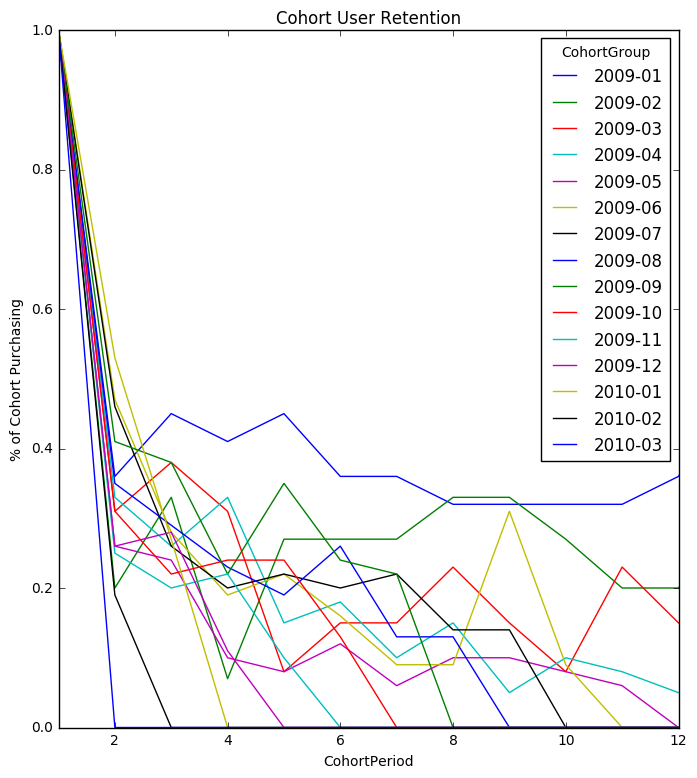

In [247]:
ax = pt.plot(figsize=(8,9))
ax.set_title("Cohort User Retention")
ax.set_xlim(1,12)
ax.set_ylabel('% of Cohort Purchasing')

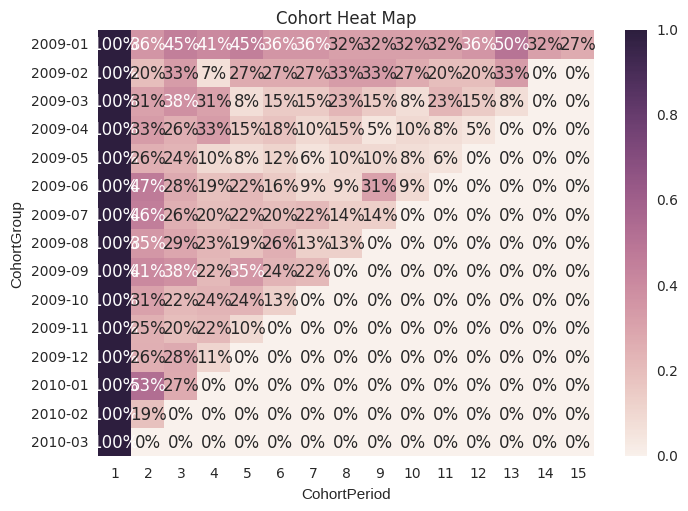

In [260]:
ax = sbn.heatmap(pt.T,mask=pt.T.isnull(), annot=True, fmt='.0%')
ax.set_title("Cohort Heat Map")